### OUTLIERS DETECTION & REMOVAL approaches
* Identifying outliers with visualization
* Interquartile Range Method( IQR ) method 
* Z-score method
* Compare Skewness

### Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

##### Import the CSV Data as Pandas DataFrame

In [2]:
data= pd.read_csv("D:\Study\Data Science\Python\ineuron\Data_Set\Student_dataset\stud.csv")
data.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Seggregating Numerical and Object Features

In [9]:
# define numerical & categorical columns
numeric_features = [feature for feature in data.columns if data[feature].dtype != 'O']
categorical_features = [feature for feature in data.columns if data[feature].dtype == 'O']
numeric_df = data[numeric_features]
categorical_df = data[categorical_features]

### 1. Identifying outliers with visualization

0 math score
1 reading score
2 writing score


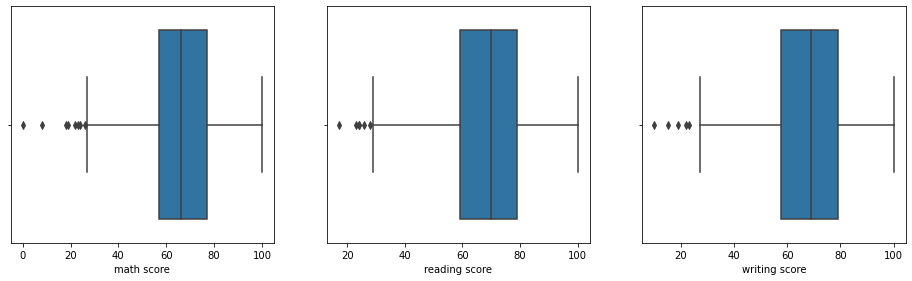

In [4]:
plt.figure(figsize=(50,20))
for i,col in enumerate(numeric_df.columns):
    print(i, col)
    plt.subplot(4,9,i+1)
    sns.boxplot(numeric_df[col])

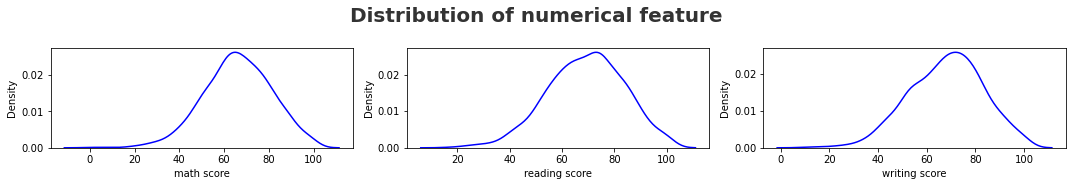

In [5]:
plt.figure(figsize=(15, 10))
plt.suptitle('Distribution of numerical feature', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
for i in range(0, len(numeric_features)):
    plt.subplot(5, 3, i+1)
    sns.kdeplot(x=data[numeric_features[i]], color='blue')
    plt.xlabel(numeric_features[i])
    plt.tight_layout()

#### Remarks
1. Math has maximum outliers followed by Reading and Writing score

### 2. Checking Outliers using Inter Quartiler Range(IQR) method

In [45]:
def check_outlier_IQR():
    for i in numeric_df.columns:
        q1 = numeric_df[i].quantile(0.25)
        q3 = numeric_df[i].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3+ 1.5*iqr
        lower_limit = q1-1.5*iqr     
        if max(numeric_df[i]) <= upper_limit and min(numeric_df[i]) >= lower_limit:
            print(f"Feature {i} has 0 outliers")
        else:
            upper_count_of_outliers = numeric_df[numeric_df[i]> upper_limit][i].size
            lower_count_of_outliers = numeric_df[numeric_df[i]< lower_limit][i].size
            count_of_outliers = upper_count_of_outliers + lower_count_of_outliers
            print(f"Feature {i} has {count_of_outliers} outliers")
            
check_outlier_IQR()

Feature math score has 8 outliers
Feature reading score has 6 outliers
Feature writing score has 5 outliers


### 3 .  Z-score  method
#### Z-score:
- It is the number of standard deviations away from the mean that a particular observation is.
- A negative Z-score means an observation is below the mean, while a positive Z-score means means it above the mean.
- The further away from 0 the Z-Score is, the further away from the mean your observation is.
- Usually z-score =3 is considered as a cut-off value to set the limit. Therefore, any z-score greater than +3 or less than - 3 is considered as outlier which is pretty much similar to standard deviation method.
- We can also use mean absoluate deviation to check the outlier as it is less sensitive towards the outlier, for this the threshold is 3.5

In [62]:
def check_outlier_Z_score(col):
    list_outliers= []
    list_mean_outliers= []
    count_z_score = 0
    count_z_mean_score = 0
    mean = numeric_df[col].mean()
    print(f"mean of {col} is {mean}")
    median = numeric_df[col].median()
    print(f"median of {col} is {median}")
    std_dev= numeric_df[col].std()
    print(f"Standard Deviation of {col} is {std_dev}")
    mean_absolute_dev= numeric_df[col].mad()
    print(f"Mean Absolute Deviation of {col} is {std_dev}")
    for i in numeric_df[col]:
        z_score = abs((i-mean)/std_dev)
        if z_score > 3:
            count_z_score += 1
            list_outliers.append(i)
    print(f"feature {col} has {count_z_score} outliers in it and the list of outlier is {list_outliers}")
    
    #second way using Mean absoluate deviation
    for i in numeric_df[col]:
        z_mean_score = abs(.6745*((i-mean)/mean_absolute_dev))
        if z_mean_score > 3.5:
            count_z_mean_score += 1
            list_mean_outliers.append(i)
    print(f"feature {col} has {count_z_mean_score} outliers in it using Mean absolute deviation and the list of outlier is {list_mean_outliers}")


for col in numeric_df.columns:
    check_outlier_Z_score(col)
              

mean of math score is 66.089
median of math score is 66.0
Standard Deviation of math score is 15.163080096009468
Mean Absolute Deviation of math score is 15.163080096009468
feature math score has 4 outliers in it and the list of outlier is [18, 0, 19, 8]
feature math score has 1 outliers in it using Mean absolute deviation and the list of outlier is [0]
mean of reading score is 69.169
median of reading score is 70.0
Standard Deviation of reading score is 14.60019193725222
Mean Absolute Deviation of reading score is 14.60019193725222
feature reading score has 4 outliers in it and the list of outlier is [17, 23, 24, 24]
feature reading score has 0 outliers in it using Mean absolute deviation and the list of outlier is []
mean of writing score is 68.054
median of writing score is 69.0
Standard Deviation of writing score is 15.195657010869642
Mean Absolute Deviation of writing score is 15.195657010869642
feature writing score has 4 outliers in it and the list of outlier is [10, 22, 19, 15]

### 4. Removing Outliers using IQR 
1. We already know the outlier values 
2. we will either trim all outliers which were outside the fence calculated using IQR or Z-scores
3. Cap the lower and upper range at 10 and 90% respectively
4. Replace with the better alternative, replace all outliers with Median values
 

#### 4.1 Using IQR  method to replace the outliers with Lower and upper limit

In [87]:
numeric_df1 = numeric_df.copy()

def remove_outlier_IQR():
    for col in numeric_df1.columns:
        q1 = numeric_df1[col].quantile(0.25)
        q3 = numeric_df1[col].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3+ 1.5*iqr
        lower_limit = q1-1.5*iqr            
        upper_count_of_outliers = numeric_df1[numeric_df1[col]> upper_limit][col].size
        lower_count_of_outliers = numeric_df1[numeric_df1[col]< lower_limit][col].size
        count_of_outliers = upper_count_of_outliers + lower_count_of_outliers
        numeric_df1.loc[(numeric_df1[col] < lower_limit), col] = lower_limit
        numeric_df1.loc[(numeric_df1[col] > upper_limit), col] = upper_limit
        print(f"From feature {col}, {count_of_outliers} outliers got fixed ")

remove_outlier_IQR()

From feature math score, 8 outliers got fixed 
From feature reading score, 6 outliers got fixed 
From feature writing score, 5 outliers got fixed 


#### Comparing the Features after fixing the outliers

In [85]:
def create_comparison_plot(df_before,df_after,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df_before[column])

    plt.subplot(2,2,2)
    sns.boxplot(df_before[column])
    plt.show()
    
    print("********************After Fixing Outliers****************")
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,3)
    sns.distplot(df_after[column])

    plt.subplot(2,2,4)
    sns.boxplot(df_after[column])
    
    print(df_before[column].size)
    print(df_after[column].size)

    plt.show()

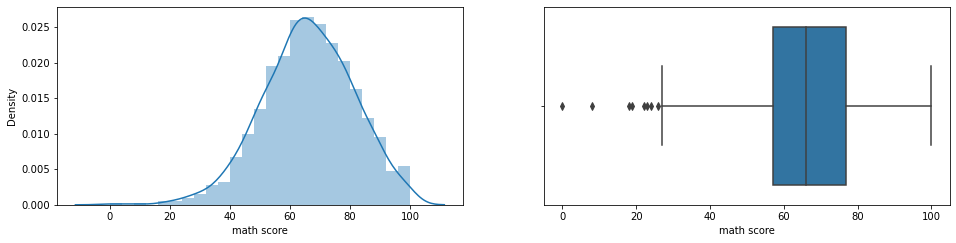

********************After Fixing Outliers****************
1000
1000


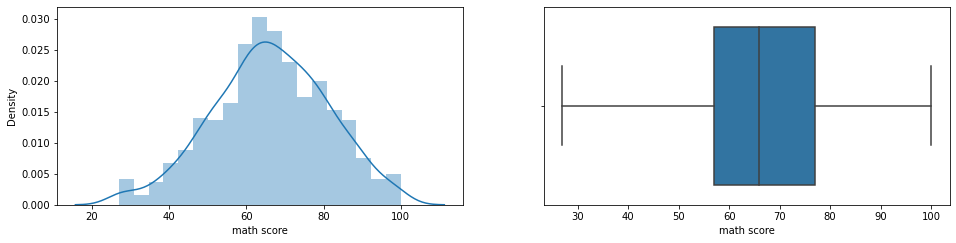

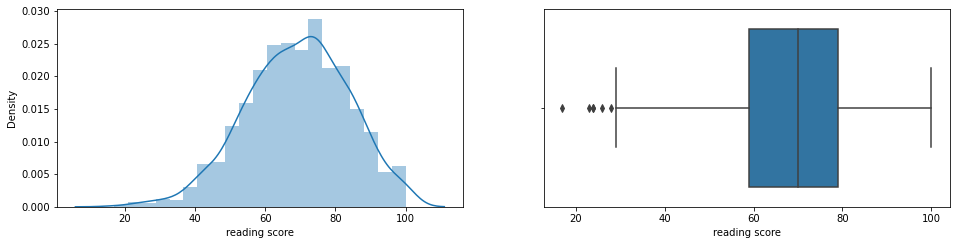

********************After Fixing Outliers****************
1000
1000


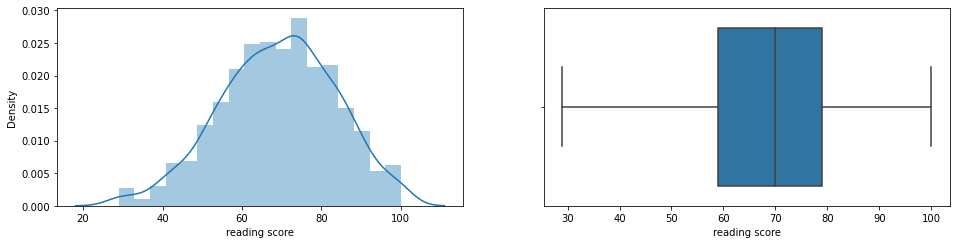

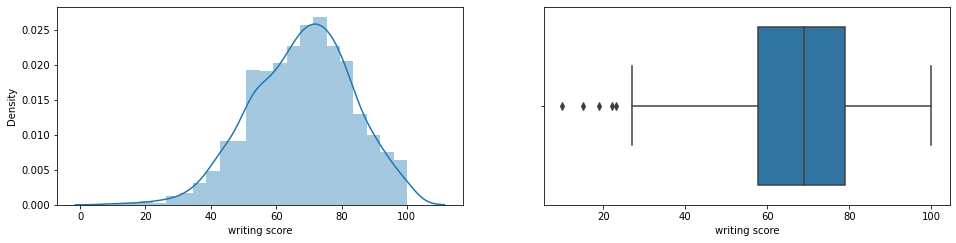

********************After Fixing Outliers****************
1000
1000


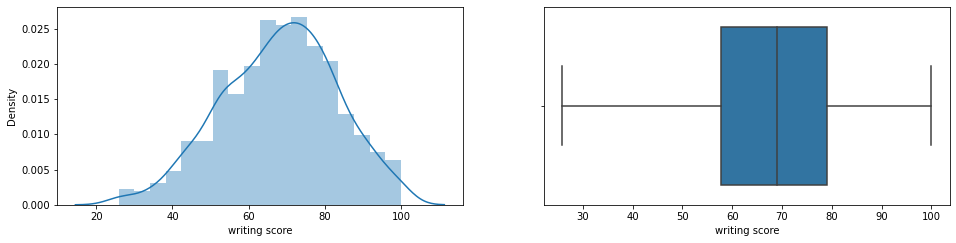

In [86]:
create_comparison_plot(numeric_df,numeric_df1,"math score")
create_comparison_plot(numeric_df,numeric_df1,"reading score")
create_comparison_plot(numeric_df,numeric_df1,"writing score")

#### 4.2 Using IQR  method to replace the outliers with Median

In [89]:
numeric_df2 = numeric_df.copy()

def remove_outlier_median_IQR():
    for col in numeric_df2.columns:
        q1 = numeric_df2[col].quantile(0.25)
        q3 = numeric_df2[col].quantile(0.75)
        iqr = q3-q1
        upper_limit = q3+ 1.5*iqr
        lower_limit = q1-1.5*iqr  
        median_val = numeric_df2[col].median()
        upper_count_of_outliers = numeric_df2[numeric_df1[col]> upper_limit][col].size
        lower_count_of_outliers = numeric_df2[numeric_df1[col]< lower_limit][col].size
        count_of_outliers = upper_count_of_outliers + lower_count_of_outliers
        numeric_df2.loc[(numeric_df2[col] < lower_limit), col] = median_val
        numeric_df2.loc[(numeric_df2[col] > upper_limit), col] = median_val
        print(f"From feature {col}, {count_of_outliers} outliers got replaced by median value {median_val}")

remove_outlier_median_IQR()

From feature math score, 0 outliers got replaced by median value 66.0
From feature reading score, 0 outliers got replaced by median value 70.0
From feature writing score, 0 outliers got replaced by median value 69.0


#### Comparing the Features after fixing the outliers

In [ ]:
def create_comparison_plot(df_before,df_after,column):
    # Comparing
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,1)
    sns.distplot(df_before[column])

    plt.subplot(2,2,2)
    sns.boxplot(df_before[column])
    plt.show()
    
    print("********************After Fixing Outliers****************")
    plt.figure(figsize=(16,8))
    plt.subplot(2,2,3)
    sns.distplot(df_after[column])

    plt.subplot(2,2,4)
    sns.boxplot(df_after[column])
    
    print(df_before[column].size)
    print(df_after[column].size)

    plt.show()

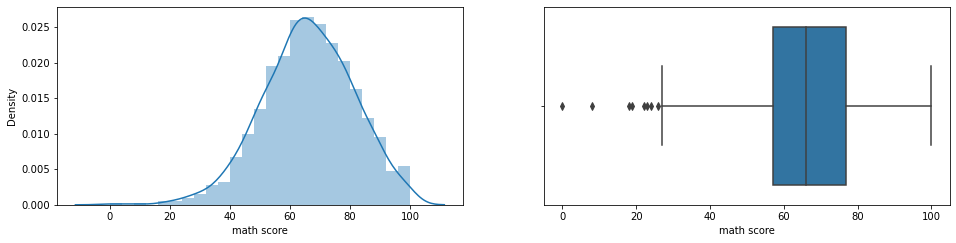

********************After Fixing Outliers****************
1000
1000


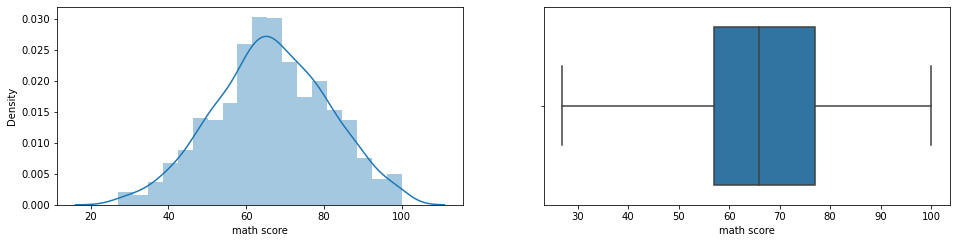

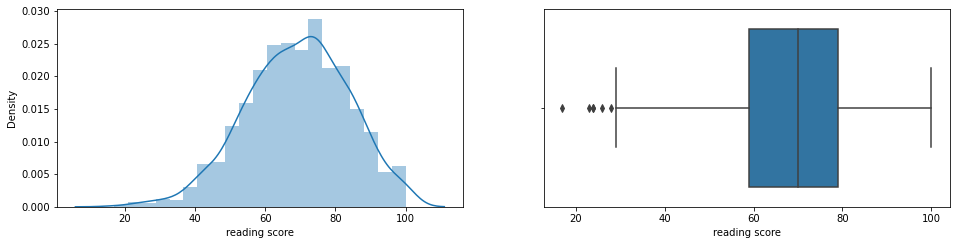

********************After Fixing Outliers****************
1000
1000


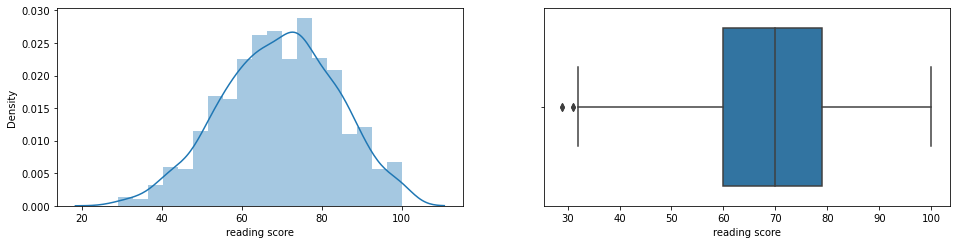

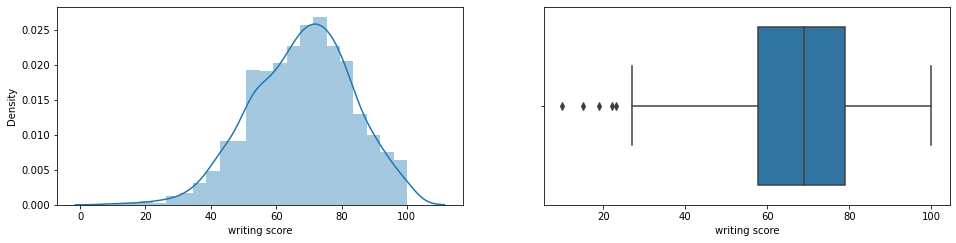

********************After Fixing Outliers****************
1000
1000


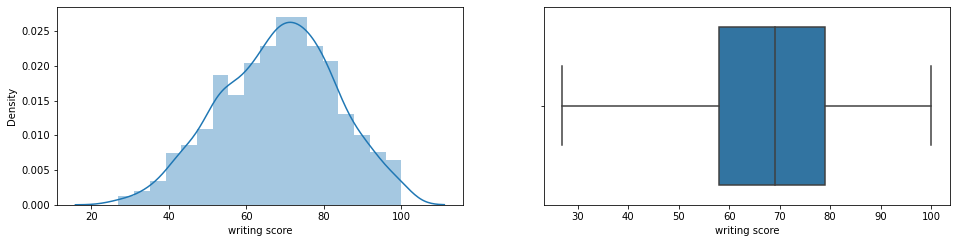

In [90]:
create_comparison_plot(numeric_df,numeric_df2,"math score")
create_comparison_plot(numeric_df,numeric_df2,"reading score")
create_comparison_plot(numeric_df,numeric_df2,"writing score")

### 4. Compare Skewness